In [3]:
import re


In [9]:
import graphviz

class State:

    def __init__(self, name, style="solid", color="black"):
        self.name = name
        self.style = style
        self.color = color
        
        self.rendered = False
        
    def set_style(self, style):
        self.style = style

    def __eq__(self, other):
        if self.name == other:
            return True
        else:
            return False
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name

    def render(self, graph):
        graph.node(self.name, style=self.style, color=self.color)


class automata:

    def __init__(self, state_names, alphabet, start_state, final_states):
        self.alphabet = alphabet
        self.start_state = start_state
        self.final_states = final_states
        self.edges = list()
        self.states = list()
        self.graph = None
        
      
        for state_name in state_names:
            style= None
            if state_name == start_state:
                self.states.append(State("", style="invis"))
                style = "bold"
                self.edges.append(["", state_name, ""])
            if state_name in final_states:
                style = "dashed"
              
            self.states.append(State(state_name, style = style))

        return
    
    def __remove_invisible(self):
        new_states = list()
        new_edges = list()
        
        for state in self.states:
            if state.style == "invis" or state.name == "":
                continue
            else:
                new_states.append(state)
        for edge in self.edges:
            if edge[0] == "":
                continue
            else:
                new_edges.append(edge)
        self.states = new_states
        self.edges = new_edges

    
    
    def __rename_states(self, name_postfix):
        renamed_states = list()
        renamed_edges = list()
        renamed_final_states = list()
            
        for s in self.states:
            if len(s.name) <= 0:
                break
            renamed_states.append(str(s)+str(name_postfix))
        for e in self.edges:
            if len(e[0]) <= 0:
                renamed_edges.append([e[0], e[1]+str(name_postfix), e[2]])

            renamed_edges.append([e[0]+str(name_postfix), e[1]+str(name_postfix), e[2]])
        for s in self.final_states:
            renamed_final_states.append(s+str(name_postfix))
                
             
        self.states = renamed_states
        self.edges = renamed_edges
        self.final_states = renamed_final_states
        self.start_state = self.start_state+str(name_postfix)
        
    def __copy(self):
        a = automata([str(s) for s in self.states[1:]], self.alphabet, self.start_state, self.final_states)
        a.edges = self.edges
        return a
    
    def from_union(automatons):
        
        new_states = list()
        new_edges = list()
        new_final_states = list()
        
        copied_automatons = list()
        
        for a in automatons:
            copied_automatons.append(a.__copy())
            
            
        i = 0
        for a in copied_automatons:
            a.__remove_invisible()
            a.__rename_states(i)
            
            new_states += a.states
            new_edges += a.edges
            new_final_states += a.final_states
            i = i+1
                   
        new_states.append("start")
                
        for a in copied_automatons:
            new_edges.append(["start", a.start_state, "ε"])
        
        new_automaton = automata(new_states, automatons[0].alphabet, "start", new_final_states)
        new_automaton.edges = new_automaton.edges + new_edges

        return new_automaton
    
    def from_concat(automatons):
        copied_automatons = list()
        
        for a in automatons:
            copied_automatons.append(a.__copy())
        
        i = 0
        for a in copied_automatons:
            a.__remove_invisible()
            a.__rename_states(i)
            i+=1

        first_automaton = copied_automatons[0]
        
        
        new_states = list()
        new_edges = list()
        new_final_states = list()
        
        for a in copied_automatons:
            new_states += a.states
            new_edges += a.edges
            new_final_states += a.final_states
            
        
        new_automaton = automata(new_states, copied_automatons[0], copied_automatons[0].start_state, new_final_states)
        
        new_automaton.edges = new_edges
            
        for i in range(len(copied_automatons)):
            last_a = copied_automatons[i]
            if i != len(copied_automatons)-1:
                next_a = copied_automatons[i+1]
            else:
                break
            for state in last_a.final_states:
                pass
                new_automaton.edge(state, next_a.start_state, "ε")
            
        return new_automaton
    
    def from_star(automaton):
        copied_automaton = automaton.__copy()
        
        copied_automaton.__remove_invisible()
        
        for state in copied_automaton.final_states:
            copied_automaton.edge(state, copied_automaton.start_state, "ε")
        
        copied_automaton.states[0].style = "solid"  
        copied_automaton.states.append(State("start"))
        copied_automaton.edge("start", copied_automaton.start_state, "ε")
        copied_automaton.start_state = "start"
        
        
        return copied_automaton
        
        
    def _check_start_end(self):
        for state in self.states:
            if state.name == "":
                continue
            if state.name == self.start_state:
                state.style = "bold" 
            if state.name in self.final_states:
                state.style = "dashed"
        return
            

    def edge(self, source, dest, rule):
        self.edges.append([source, dest, "  "+rule])
        if source not in self.states:
            self.states.append(State(source))
            self._check_start_end()
        if dest not in self.states:
            self.states.append(State(dest))
            self._check_start_end()
        return
    
    def _repr_svg_(self):
        self.graph = graphviz.Digraph()
        
        self._check_start_end() # Update if we changed/added the start/end states since making this obeject
        
        for state in self.states:
            state.render(self.graph)

        for e in self.edges:
            self.graph.edge(e[0], e[1], label=e[2])

        return self.graph._repr_svg_()


Style is invisible
Style is invisible
Edge is blank
Style is invisible
Style is invisible
Edge is blank


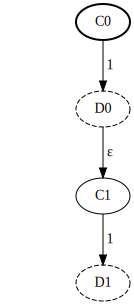

In [5]:
a = automata(["A", "B",], [1,2], "A", "B")
a.edge("A", "B", "0")


b = automata(["C", "", "D"], [], "C", "D")
b.edge("C", "D", "1")

c = automata.from_concat([b,b])
c

# Regexplained 

## Samathy Barratt - PyConUK 2019





*@samathy_barratt*

*s@social.samathy.space*


CC-BY-SA Samathy Barratt

Going to discuss:
* Set Theory
* Theory of computation
* Finite Automata
* Languages
* Regular Expressions

Regular Expressions

What is a regular expression?

A garbled collection of characters which somehow recognises strings

to me, they were always magic incantations - until I understood that they're more like an assembly language for finite automata.

##Where can we find regexes?

###String Matching

* Compilers

* Web Servers

* Pretty much any program that needs to know if a string, is a particular type of string or not

And that includes knowing if the type of string, is one that contains a substring or not.

Lets get onto looking at a regular expression

### `^(\w)+\@(\w)+\.(\w)`

A simple, nieve regex which matches email addresses

In [6]:
#A very simple Regex

regex = re.compile("^(\w)+\@(\w)+\.(\w)")

expanse_characters = [
    "chrisjen_avasarala@UN.com",
    "James_Holden",
    "Amos_Burton",
    "Praxidike Meng",
    "Mei Meng",
    "Josephus_Miller@StarHelix.net",
    "Naomi_Nagata",
    "Bobbie Draper",
    "Dimitri_Havelock@StarHelix.net",
    "Fred_Johnson@TychoStation.space",
]

list(filter(regex.match, expanse_characters))



['chrisjen_avasarala@UN.com',
 'Josephus_Miller@StarHelix.net',
 'Dimitri_Havelock@StarHelix.net',
 'Fred_Johnson@TychoStation.space']

In [7]:
a = automata(
["A", "B", "C", "D"],
[],
"A",
["D"])

a.edge("A", "A", "\w")
a.edge("A", "B", "@")
a.edge("B", "B", "\w")
a.edge("B", "C", "\.")
a.edge("C", "D", "\w")
a.edge("D", "D", "\w")


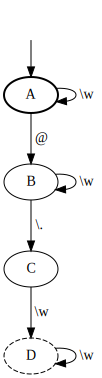

In [8]:
a

Or, we could display it as a graph of some sort.

This graph _could_ be described like so:

$$ Q = \{q0, q1, q2, q3 \} $$
$$ \Sigma = \{\{a,b,c,d,e,f... x,y,z\}, \{"Unicode characters" \} $$
$$ \delta = Q x \Sigma \rightarrow Q $$
$$ q0 \in Q $$
$$ F \subseteq Q $$







A bit better, but lets look at whats going on here.

We have broken our regular expression into a graph

This graph, and the formal mathematical explaination of it above, is a Deterministic Finite Automaton.

##Finite Automata

State Machines

Finite Automata, or state machines

The simplest model of computing
Very little memory, but surprisingly useful processing power.
Present in many small machines - like an electric door, or perhaps a washing machine.
Used in parts of compilers and many, many programs.
Can be used to represent much more complex computational problems.

Capable of recognising _Regular Languages_

**Set** $\rightarrow$ A collection of items where no item appears more than once.

**Language** $ \rightarrow $ The set of strings recognised by a machine



**String (over an alphabet)** $ \rightarrow $ A combination of symbols such that each symbol in the string is an element of the alphabet.

**Alphabet** $\rightarrow$ A finite set of symbols

* **Set** $\rightarrow$ A collection of items where no item appears more than once. 
* **Language** $ \rightarrow $ The set of strings recognised by a machine $ L = \{ 001, 110, 111111, S_1, S_2 ... \} $
* **String (over an alphabet)** $ \rightarrow $ A combination of symbols such that each symbol in the string is an element of the alphabet. $ S = \{ w | w \in A \} $
* **Alphabet** $\rightarrow$ A finite set of symbols $ A = \{0,1\} $

**Empty String** $ \rightarrow $ $ \varepsilon$ , A string containing no characters, a 0 if you will

**Empty Set** $ \rightarrow $ $ \emptyset $, A set containing nothing.

### A Language is a _regular language_ as long as some finite automaton recognises it

A regular language is simple a collection of symbols from an alphabet. Can be letters, numbers, tokens or some other signal.

Ditching the regular expression for a second, lets look at what a finite automoton is

Lets recognise strings containing `01` anywhere.

DFA for strings containing 01

$$ Q = \{A, B, C \} $$
$$ \Sigma = \{0,1\}$$
$$ \delta = Q x \Sigma \rightarrow Q $$
$$ A \in Q $$
$$ F \subseteq Q = C $$


In [251]:
states = set(["A", "B", "C"]) # Q = {"A", "B"}
alphabet = set([0,1])    # Σ = {0,1}
start_state = "A" # A is in states
end_state = states.intersection(set(["C"]))

In [317]:
zero_one_a = automata(states, alphabet, start_state, end_state)

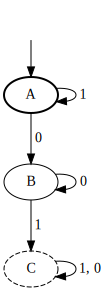

In [318]:
zero_one_a.edge("A", "A", "1")
zero_one_a.edge("A", "B", "0")
zero_one_a.edge("B", "B", "0")
zero_one_a.edge("B", "C", "1")
zero_one_a.edge("C", "C", "1, 0")

zero_one_a

DFAs have a number of states.

A here, is our starting state, A

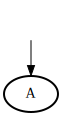

In [319]:
a = automata(["A"], [], "A", "")
a

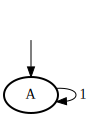

In [320]:
a.edge("A", "A", "1")
a

Our start state takes parts of our string as input, and does one of two things.

If its a 1, the machine stays in the A state
If its a 0, it moves on - perhaps because this is the start of the '01' string we're looking for.

If it stays in the A state and reaches the end of the string, the machine returns False, it dies, the input was
not one that we wanted.

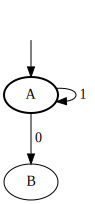

In [321]:
a.edge("A", "B", "0")
a

Next, we add the move to state `B`, only if the character was `0`.
We can essentially skip state A if the first character is `0`

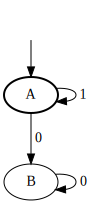

In [322]:
a.edge("B", "B", "0")
a

If the next character is a 0, then we've broken the 01 sequence.
cycle around on B until the next character.


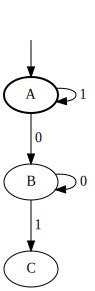

In [323]:
a.edge("B", "C", "1")
a

If the next one is a 1, then the `01` sequence is continued!

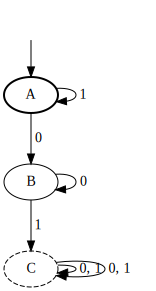

In [325]:
a.final_states = set("C")
a.edge("C", "C", "0, 1")
a

Finally, we cycle around on C in case there are spare characters at the end of the string.
If we reache the end of the string while sitting in the C state, then we're complete! we accept the string!

Hopefully this all makes sense!

Before we go back to Regular Expressions - we have to jump into _non-deterministic finite automoton_

##Non-Deterministic Finite Automoton

Unlike the prior example ( A deterministic finite automoton ) - NFAs are capable of being in more than one state at once.

NFA is a generalizeation of a DFA.
Every DFA is an NFA, just a restricted one.

In a DFA, every state has exactly one edge for every item in the alphabet.
An NFA may have many.

Consider an NFA which recognises the language of strings ending in `110`

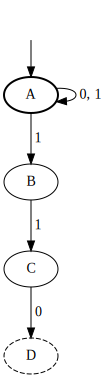

In [334]:
states = ["A", "B", "C", "D"]
alphabet = set([0,1])
start_state = "A"
end_states = set("D")

a = automata(states, alphabet, start_state, end_states)

a.edge("A", "A", "0, 1")
a.edge("A", "B", "1")
a.edge("B", "C", "1")
a.edge("C", "D", "0")

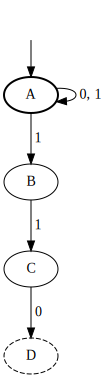

In [335]:
a

This automaton can be in two states at once - this means that for any character, it can both stay in the `A` state and transition to the `B` state.

You can think of this like forking a program for every node which has more than one edge for a given character of the alphabet.

NFAs can be reduced to DFAs through several different methods that I won't be going into today.

The main bonus of an NFA is the ability to represent more complex computations in less space than we'd need for the equivilent DFA.

They can't do more, or less than a DFA.

## Combining finite automation

If we have two automata which recognise two languages with the same alphabet. It is useful to be able to combine those automata into the same machine.

### Union
A Logical `OR`

Consider our automaton which recognises strings containing `110`

In [209]:
states = ["A", "B", "C", "D"]
alphabet = set([0,1])
start_state = "A"
end_states = set("D")

a = automata(states, alphabet, start_state, end_states)

a.edge("A", "A", "0, 1")
a.edge("A", "B", "1")
a.edge("B", "C", "1")
a.edge("C", "D", "0")
a.edge("D", "D", "0, 1")

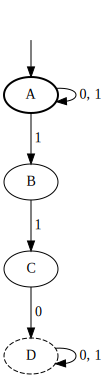

In [210]:
a

We might want to also recognise languages which contain the substring containing `111`

In [211]:
b = automata(states, alphabet, start_state, end_states)

b.edge("A", "A", "0, 1")
b.edge("A", "B", "1")
b.edge("B", "C", "1")
b.edge("C", "D", "1")
b.edge("D", "D", "0, 1")

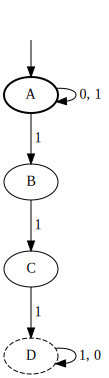

In [203]:
b

If we wish to now recognise the language of strings containg _either_ `110` or `111`, we can combine the two automata in an Union

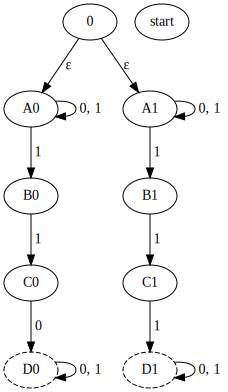

In [257]:
a_union = a
b_union = a

unioned = automata.from_union([a,b])
unioned

When strings are processed by this NFA they can be analyzed by both the left and right paths at once, possibly reaching a final state in either, or both.

Thus, the Union operation can be consitered similar to a logical, inclusive OR.

### $\varepsilon$
Hello again, Epsilon!

The $\varepsilon$ symbol here represents the _empty string_.


In the context of finite automaton, this means that we change state whatever the input symbol is.

### Concatination
A logical AND

We can also stick two NFAs after one another in a concatination.

This produces a result like that or a logical AND - the language must be accepted by both automata in the chain.

Combing our two automaton from earlier in concatination we get the following:

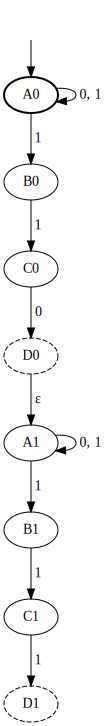

In [200]:
concatinated = automata.from_concat([a,b])

concatinated

Strings accepted by this machine must contain `110` followed by `111`

### Star

_More than one of that_

The star operation duplicates a machine so that it accepts a string which contains any number of strings in the language combined together.

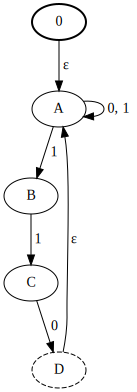

In [201]:
star = automata.from_star(a)

star


Essentially - once a string has reached the final state because part of it matches the language, it runs back around to the starting state again, to check for more occurances!

## Regular Expressions
_What you've all been waiting for!_

No we know how to take multiple NFAs which recognise regular languages and combine them, we can represent those combinations as an expression

$$ ( 0 \cup 1 )^* (110 \cup 111 ) (0 \cup 1)^* $$

The language of strings containing both `110` and `111` anywhere in the string.

This regular expression describes a language that we've seen before. the language of strings which contain either `110` or `111`

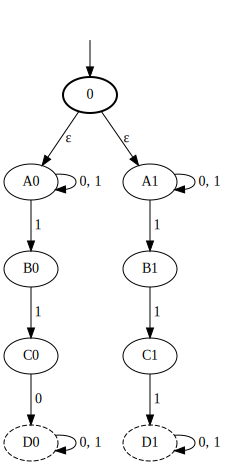

In [217]:
unioned

A0 and A1 handle the $(0 \cup 1)$

B0, B1  through to D0 and D1 handle the mathching of `110` and `111`. and D0 and D1 finally spin until they reach the end of the string.

While we know that this NFA is one we've seen before - for practice, lets build up an NFA to represent our regular expression above.

This preceedure won't give an NFA with the fewest number of states - but it does demonstrate how Regular Expressions can be converted into an NFA diagram.

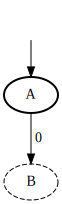

In [263]:
zero = automata(["A", "B"], ["0", "1"], "A", ["B"])
zero.edge("A", "B", "0")

zero

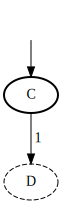

In [264]:
one = automata(["C", "D"], ["0", "1"], "C", ["D"])
one.edge("C", "D", "1")

one

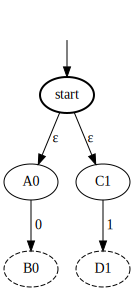

In [265]:
zero_one = automata.from_union([zero, one])

zero_one

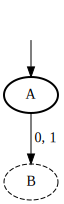

In [266]:
zero_one = automata(["A", "B"], ["0", "1"], "A", "B")
zero_one.edge("A", "B", "0, 1")
zero_one

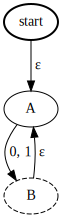

In [267]:
zero_one_star = automata.from_star(zero_one)
zero_one_star

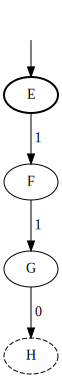

In [268]:
oneonezero = automata(["E", "F", "G", "H"], ["0", "1"], "E", ["H"])
oneonezero.edge("E", "F", "1")
oneonezero.edge("F", "G", "1")
oneonezero.edge("G", "H", "0")

oneonezero

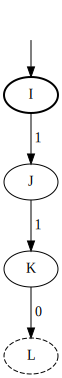

In [269]:
oneoneone = automata(["I", "J", "K", "L"], ["0", "1"], "I", ["L"])
oneoneone.edge("I", "J", "1")
oneoneone.edge("J", "K", "1")
oneoneone.edge("K", "L", "0")

oneoneone

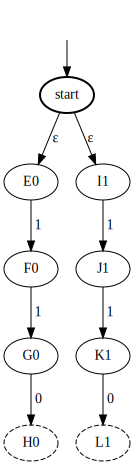

In [352]:
substring = automata.from_union([oneonezero, oneoneone])

substring


Style is invisible
Style is invisible
Style is invisible
Edge is blank
Style is invisible


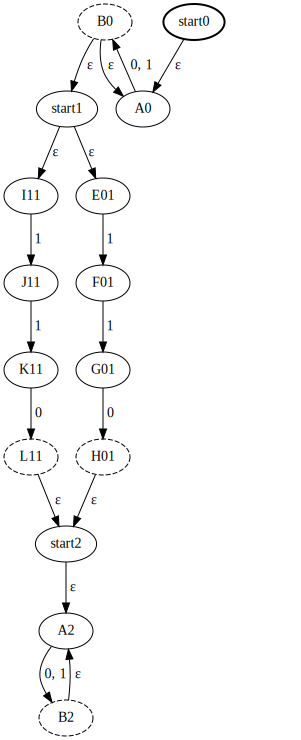

In [390]:
full = automata.from_concat([zero_one_star, substring, zero_one_star])

full

There we have it! A long winded, but correct NFA for our regular expression.


## Let's do an email

`^(\w)+\@(\w)+\.(\w)`

In [392]:
alphabet = ["a", "b", "c", "d", "@", "."] # For conciseness - we won't match every available character ever

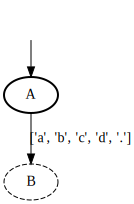

In [397]:
characters = automata(["A", "B"], ["a", "b", "c", "d", "."], "A", ["B"])

characters.edge("A", "B", str(["a", "b", "c", "d", "."]))

characters

Style is invisible
Edge is blank


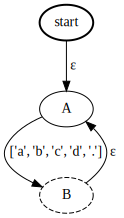

In [401]:
characters_star = automata.from_star(characters)

characters_star

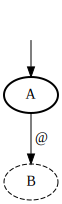

In [398]:
at = automata(["A", "B"], ["@"], "A", ["B"])

at.edge("A", "B", "@")

at

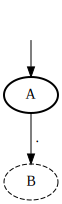

In [400]:
dot = automata(["A", "B"], ["."], "A", ["B"])

dot.edge("A", "B", ".")

dot

Style is invisible
Style is invisible
Edge is blank
Style is invisible
Style is invisible
Edge is blank
Style is invisible


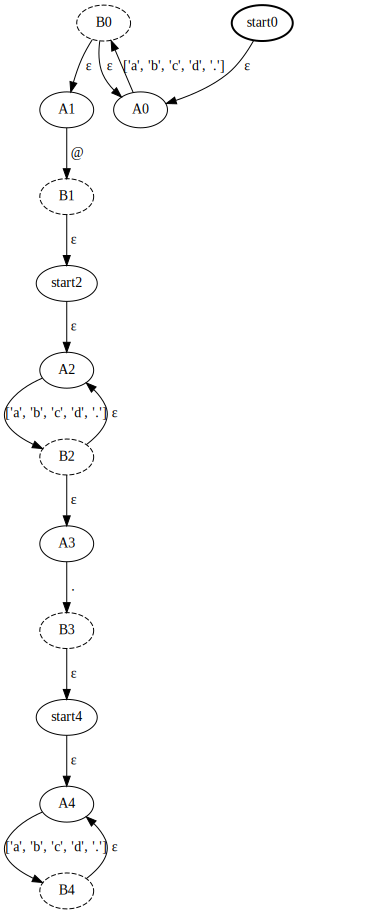

In [404]:
full = automata.from_concat([characters_star, at, characters_star, dot, characters_star])

full

## Phew, done!

## Recap

* Finite Automaton are simple _state machines_

* Deterministic Finite Automaton & Non-Deterministic Finite Automaton recognise Regular Languages

* They are all equivilent in power

* A Regular Expression describes a regular language

* Regular Expressions can be drawn as Finite Automaton

## Further Reading

* Generalised NFAs - Converting a DFA into a regular expression

* Introduction to the Theory of Computation - M.Sipser

## Samathy Barratt
### @samathy_barratt
### s@social.samathy.space
### samathy.sbarratt.co.uk